# Advertising Sales Channel Prediction

Feature variables:

   * Unnamed 0
   * TV
   * radio
   * newspaper
   
Target variable:

   * sales

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# ANALYSIS

                                  Describe the dataset

In [8]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


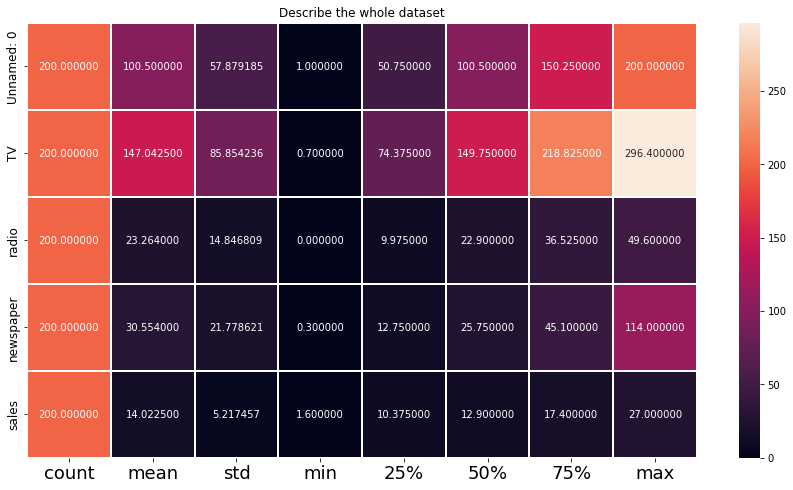

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

The number of rows and columns are:
    
    * Rows = 200
    * Columns = 4
    
The mean, std, minimum and maximum value are:
    
    * Unnamed 0:
            mean    = 100.500000
            std     = 57.87985
            minimum = 1.000000
            maximum = 200.000000
            
    * TV:
            mean    = 147.042500
            std     = 85.854236
            minimum = 0.700000
            maximum = 296.400000
            
    * radio:
            mean    = 23.264000
            std     = 14.846809
            minimum = 0.000000
            maximum =   49.600000
            
    * newspaper:
            mean    = 30.554000
            std     = 21.778621
            minimum = 0.300000
            maximum = 114.000000      

                                          Visualisation

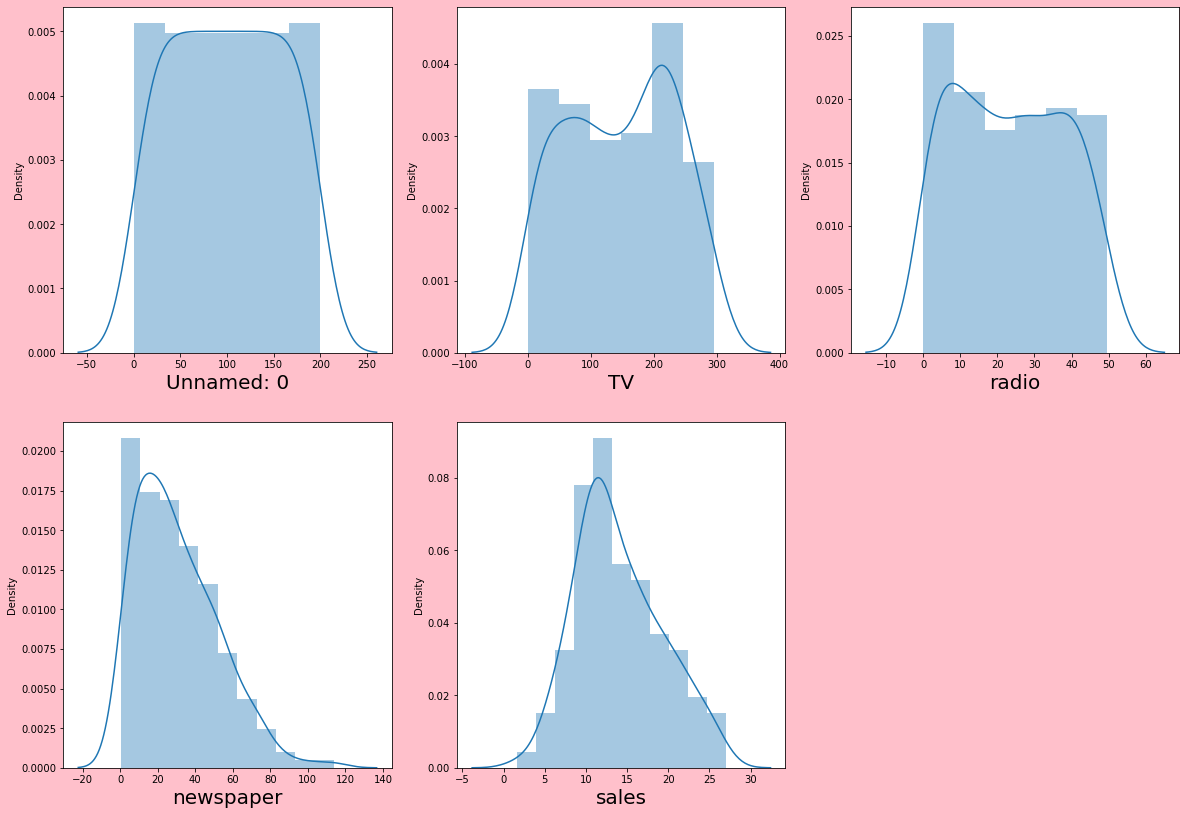

In [11]:
plt.figure(figsize=(20,14),facecolor = 'pink')
plotnumber =1

for column in data:
    if plotnumber <=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

                                        Correlation

In [12]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

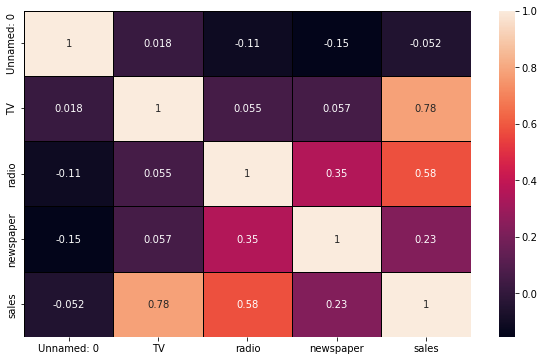

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

Unnamed 0 has negative correlation and TV, radio and newspaper have positive correlation

Correlation of dependent and independent variable are:
    
    Unnamed 0 has 5% correlation with target variable which can be consider weak bond.
    TV has 78% correlation with target variable which can be consider Strong bond.
    radio has 58% correlation with target variable which can be consider strong bond.
    newspaper has 23% correlation with target variable which can be consider good bond.
        

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

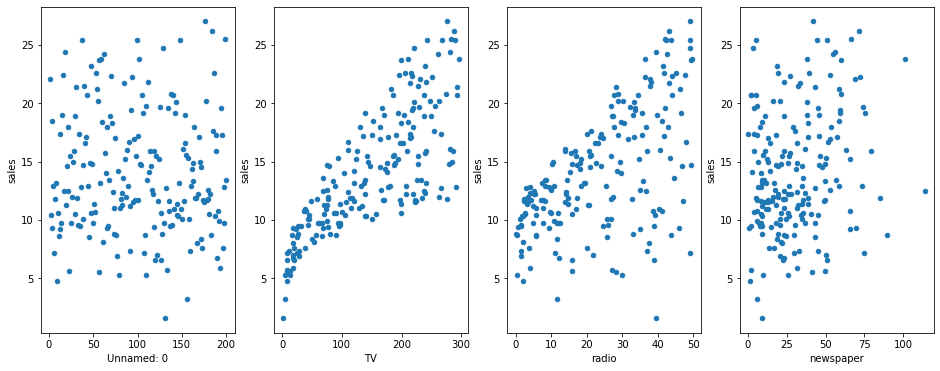

In [16]:
# Correlation of feature variable to the target variable

fig,axs = plt.subplots(1,4)                                                        

data.plot(kind='scatter', x='Unnamed: 0', y='sales', ax=axs[0],figsize=(16,6))
data.plot(kind='scatter', x='TV', y='sales', ax=axs[1])
data.plot(kind='scatter', x='radio', y='sales', ax=axs[2])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[3])  

                                     Skewness

In [17]:
data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Take range value of skewness is (-0.5,0.5)

Skewness is present in the newspaper.

                                        Outliers

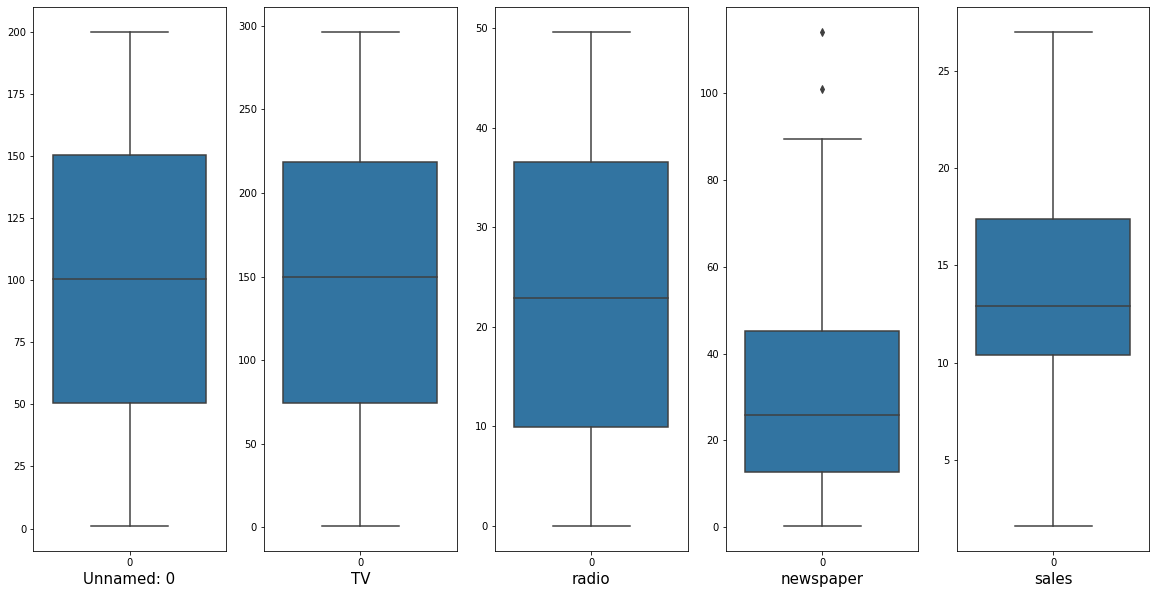

In [18]:
plt.figure(figsize=(20,10))
number = 1

for column in data:
    if number <=5:
        plt.subplot(1,5,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()     

Outliers are present in the newspaper

                               VIF for multicolinearity

In [20]:
x = data.drop(['sales'],axis=1)
y = data['sales']

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.029228,Unnamed: 0
1,1.005467,TV
2,1.149295,radio
3,1.163551,newspaper


VIF vale is less than 5 so,there is no multicolinearity b/w one feature to another feature.

                                     sqrt transformer
    
  To remove skewness present in the newspaper we use transformer method

In [23]:
data["newspaper"]=np.sqrt(data["newspaper"])

In [24]:
data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.062388
sales         0.407571
dtype: float64

Now, the data is not skewed

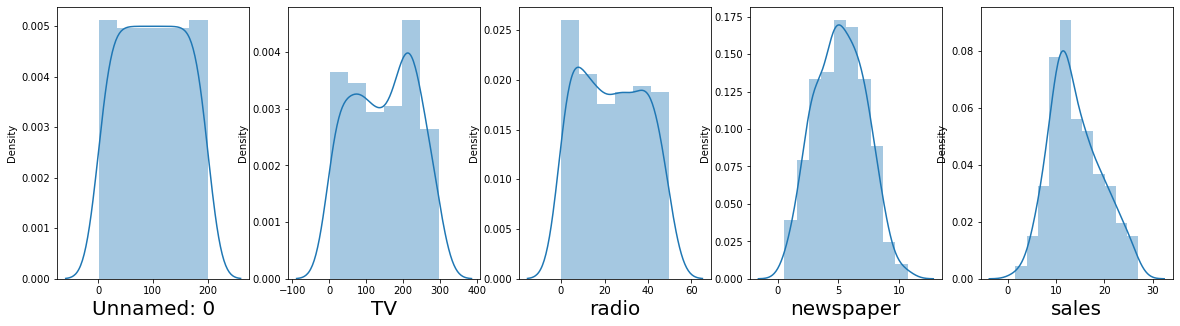

In [25]:
plt.figure(figsize=(20,5),facecolor = 'white')
plotnumber =1

for column in data:
    if plotnumber <=5:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

# Model Testing

Unnamed 0 has very weak correlation and uniform (at 0 to 200) so we remove it.

In [26]:
# input variables
x=data.drop(['sales','Unnamed: 0'],axis=1)

# output variable
y=data['sales']

In [27]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                       Linear Regression

In [28]:
lr=LinearRegression()

In [29]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("The model perform very well")
        print("random state",i)
        print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
        print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
        print('\n')

The model perform very well
random state 95
Training accuracy score: 89.4
Testing accuracy score: 89.4


The model perform very well
random state 106
Training accuracy score: 89.6
Testing accuracy score: 89.6


The model perform very well
random state 146
Training accuracy score: 89.7
Testing accuracy score: 89.7


The model perform very well
random state 185
Training accuracy score: 89.6
Testing accuracy score: 89.6


The model perform very well
random state 203
Training accuracy score: 89.7
Testing accuracy score: 89.7


The model perform very well
random state 268
Training accuracy score: 89.7
Testing accuracy score: 89.7


The model perform very well
random state 356
Training accuracy score: 89.6
Testing accuracy score: 89.6


The model perform very well
random state 442
Training accuracy score: 89.5
Testing accuracy score: 89.5


The model perform very well
random state 474
Training accuracy score: 89.7
Testing accuracy score: 89.7


The model perform very well
random state 544
Tr

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =998)

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
pred_test=lr.predict(x_test)

accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 89.68534130419984


In [33]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8916349860383765


At cross fold 3 the cv score is 0.8915588165323286


At cross fold 4 the cv score is 0.8903579284297554


At cross fold 5 the cv score is 0.8873331295445761


At cross fold 6 the cv score is 0.8900202280811488


At cross fold 7 the cv score is 0.8861692012354758


At cross fold 8 the cv score is 0.8826536626159895


At cross fold 9 the cv score is 0.882418124174371




In [34]:
lrscore=cross_val_score(lr,x_scaled,y,cv=2)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 89.16349860383765


In [35]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1.2304703696583756
Mean square error: 2.496399468855517
Root mean square error: 1.5799998319162938


                                       Decission Tree Regressor

In [36]:
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [37]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score of testing:",dtrs*100)

dtrscore=cross_val_score(dtr,x_scaled,y,cv=2)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

R2 score of testing: 94.64723474463193
cross val score: 93.80506974159097


In [38]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.8400000000000002
Mean square error: 1.2954999999999999
Root mean square error: 1.1382003338604325


                                     Random Forest Regressor

In [390]:
rfr=RandomForestRegressor()

rfr.fit(x_train,y_train)

RandomForestRegressor()

In [391]:
pred_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",rfrs*100)

rfrscore=cross_val_score(rfr,x_scaled,y,cv=2)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

R2 score for testing: 98.34808468463025
cross val score: 97.1037677609865


In [392]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.49332499999999896
Mean square error: 0.39980387499999825
Root mean square error: 0.6323004625966979


                                       Ada Boost Regressor

In [43]:
ada= AdaBoostRegressor()

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [45]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

adascore=cross_val_score(ada,x_scaled,y,cv=2)
adac=adascore.mean()
print('cross val score:',adac*100)

R2 score: 96.77693875562152
cross val score: 95.25781565547258


In [46]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.7227624292518143
Mean square error: 0.7800595846987536
Root mean square error: 0.8832098191815768


                                 Gradient Boosting Regressor

In [47]:
gb= GradientBoostingRegressor()

gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [48]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

gbscore=cross_val_score(gb,x_scaled,y,cv=2)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

R square score 98.73795173084558
cross val score: 97.35661813587309


In [49]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.45183946527667357
Mean square error: 0.3054465224399496
Root mean square error: 0.5526721654289726


The value of r2 score and cv for the 5 machine learning model are:
    
* Linear Regression
     r2_score: 89.68
        cv   : 89.16
            
* Decission Tree Regressor
     r2_score: 94.64
        cv   : 93.80
            
* Random Forest Regressor
     r2_score: 98.34
        cv   : 97.10
            
* AdaBoostRegressor
     r2_score: 96.77
        cv   : 95.25
            
* Gradient Boosting Regressor
     r2_score: 98.73
        cv   : 97.35
            
All the model give good result but Decission Tree Regressor and Gradient Boosting Regressor give better result because its 
score is maximum and the difference is very less. From both of them we select the model for our prediction is Random Forest
Regressor.

# Random Forest Regressor

                                        HYPER TUNNING

In [393]:
rfr=RandomForestRegressor()

In [394]:
parameters = {'max_features':['auto','sqrt'],
             'max_depth':range(10,25),
             'min_samples_leaf':range(2,5),
             'min_samples_split':range(2,5)}

In [407]:
RCV=RandomizedSearchCV(rfr,parameters,cv=2,n_jobs=-1)
RCV.fit(x_train,y_train)
RCV.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 18}

In [408]:
clf = RandomForestRegressor(min_samples_split=3,min_samples_leaf=2,max_features='auto',max_depth=18)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)*100

98.41225573304689

In [ ]:
After hyper tuning we get value of random forest is 98.41% and previous value of accuracy score is 98.34%. The variation comes
only in the decimal value.

                                 Plot a graph b/w actual and predicted value

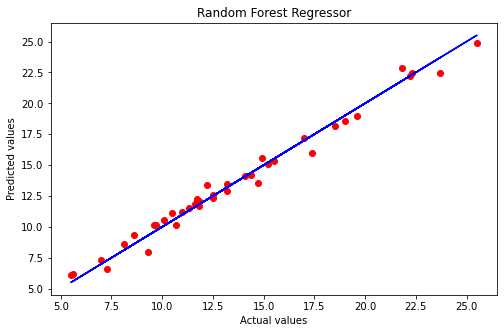

In [409]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

There is less variation b/w actual and predicted values.
The r2_score for the model is 98.41%

                                     Save file using pikle method

In [413]:
filename='sales.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [417]:
loaded_model= pickle.load(open('sales.pkl','rb'))
result= loaded_model.score(x_test,y_test)
print(result)

0.9838021635728417


                                        Conclusion

In [420]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred})
Prediction

,Actual_value,Predicted_value
3,18.5,18.131441
74,17.0,17.157619
100,11.7,12.187804
151,11.6,11.842364
138,9.6,10.159295
157,10.1,10.537067
79,11.0,11.215221
173,11.7,12.231314
22,5.6,6.196924
16,12.5,12.618142
